In [19]:
import imutils
import cv2
import matplotlib.pyplot as plt
import numpy as np
from constants import *

In [20]:
def plot_image(image: cv2.Mat):
    figure = plt.figure(figsize=(5, 5))
    if len(image.shape) == 2:
        # Grayscale image.
        plt.imshow(image, cmap='gray')
    else:
        # OpenCV encodes images in BGR instead of RGB.
        # For colors to show correctly, we must convert first to RGB.
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)

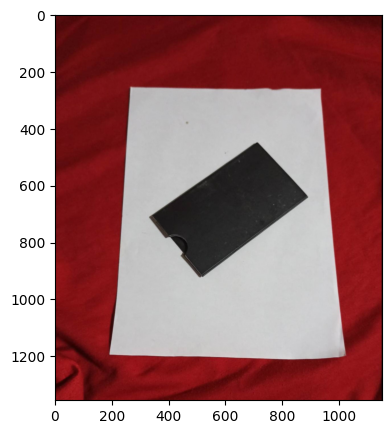

In [21]:
# Read the image we will test with.
image = cv2.imread('test.png')
plot_image(image)

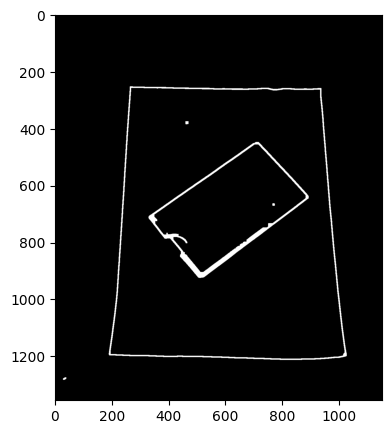

In [22]:
preprocessed_image = imutils.preprocess_image(image)
# Pass "gray" to cmap to plot the image as grayscale.
plot_image(preprocessed_image)

In [23]:
contours = imutils.find_contours(image, min_area=1000)
len(contours)

1

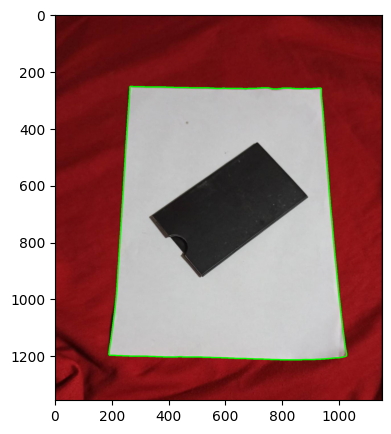

In [24]:
# Draw the contours on a copy of the image to avoid changing the original image.
copy = image.copy()
imutils.draw_contours(image=copy, contours=contours)
plot_image(copy)

In [25]:
approximating_rectangles = imutils.find_approximating_polygons(contours, filter_by_sides=4)
len(approximating_rectangles)

1

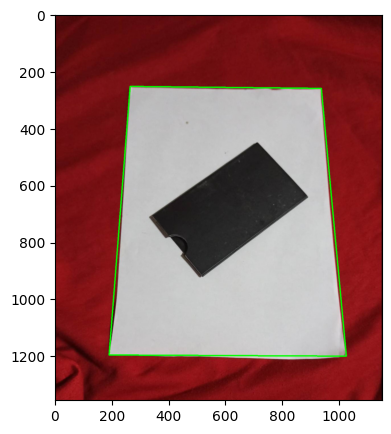

In [26]:
# Draw the approximating rectangles to compare with the contour.
copy = image.copy()
imutils.draw_contours(image=copy, contours=approximating_rectangles)
plot_image(copy)

In [27]:
min_area_rectangles = [ imutils.find_min_area_rectangle(contour) for contour in contours ]

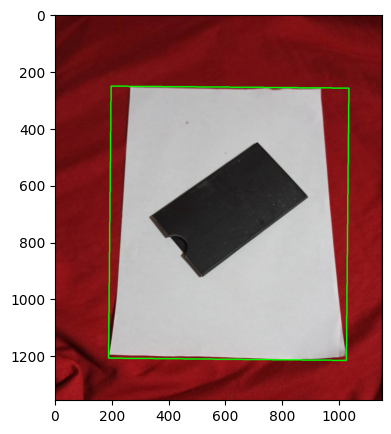

In [28]:
copy = image.copy()
imutils.draw_contours(image=copy, contours=min_area_rectangles)
plot_image(copy)

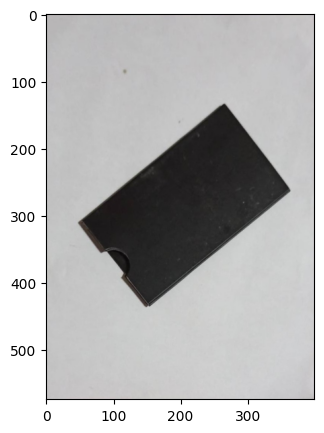

In [29]:
inner_frame = imutils.warp_image(image, rectangle=approximating_rectangles[0], width=A4_WIDTH, height=A4_HEIGHT)
plot_image(inner_frame)

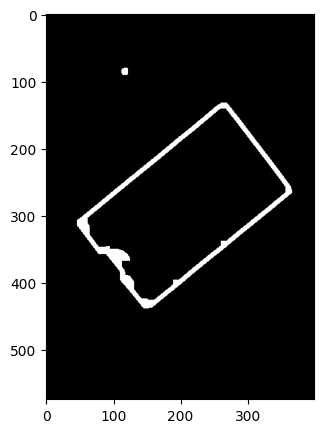

In [30]:
preprocessed_inner_frame = imutils.preprocess_image(inner_frame)
plot_image(preprocessed_inner_frame)

In [31]:
inner_contours = imutils.find_contours(image=inner_frame, min_area=250)
len(inner_contours)

1

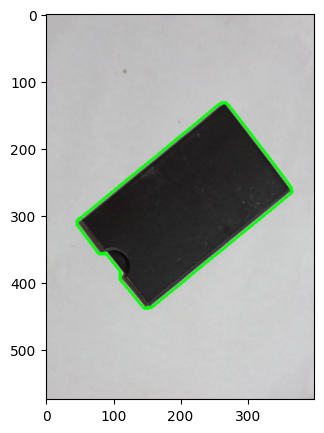

In [32]:
copy = inner_frame.copy()
imutils.draw_contours(image=copy, contours=inner_contours)
plot_image(copy)

In [33]:
min_area_rectangle = imutils.find_min_area_rectangle(inner_contours[0])

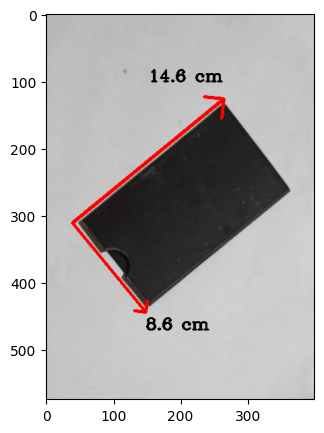

In [34]:
copy = inner_frame.copy()
imutils.draw_dimensions(image=copy, rectangle=min_area_rectangle)
plot_image(copy)

In [35]:
approximating_rectangles = imutils.find_approximating_polygons(contours=inner_contours)
len(approximating_rectangles)

1

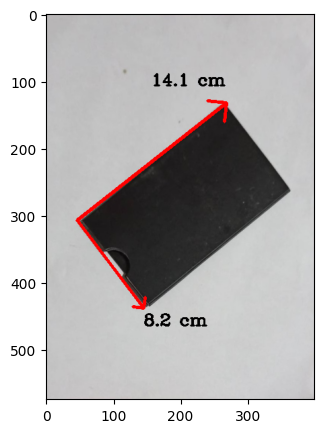

In [36]:
copy = inner_frame.copy()
imutils.draw_dimensions(image=copy, rectangle=approximating_rectangles[0])
plot_image(copy)